# EDA and Data Cleaning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Merge-Goolge-dataset-with-Income-dataset" data-toc-modified-id="Merge-Goolge-dataset-with-Income-dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Merge Goolge dataset with Income dataset</a></span></li><li><span><a href="#Shuffle-the-dataset" data-toc-modified-id="Shuffle-the-dataset-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Shuffle the dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Create-interaction-column-using-Google-dataset" data-toc-modified-id="Create-interaction-column-using-Google-dataset-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Create interaction column using Google dataset</a></span></li><li><span><a href="#Create-aggregated-features-for-each-zip-code" data-toc-modified-id="Create-aggregated-features-for-each-zip-code-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Create aggregated features for each zip code</a></span></li><li><span><a href="#Create-transformation-columns-using-demographic-information-from-'income'-dataset" data-toc-modified-id="Create-transformation-columns-using-demographic-information-from-'income'-dataset-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>Create transformation columns using demographic information from 'income' dataset</a></span></li></ul></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Investigate-target-column-'home_price_to_income_ratios'" data-toc-modified-id="Investigate-target-column-'home_price_to_income_ratios'-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Investigate target column 'home_price_to_income_ratios'</a></span><ul class="toc-item"><li><span><a href="#TODO:-Visualiazation-for-Distribution-of-Home-Price-to-Income-Ratios" data-toc-modified-id="TODO:-Visualiazation-for-Distribution-of-Home-Price-to-Income-Ratios-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>TODO: Visualiazation for Distribution of Home Price to Income Ratios</a></span></li></ul></li><li><span><a href="#Investigate-categorical-data" data-toc-modified-id="Investigate-categorical-data-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Investigate categorical data</a></span></li><li><span><a href="#Investigate-numerical-data" data-toc-modified-id="Investigate-numerical-data-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Investigate numerical data</a></span></li><li><span><a href="#EDA-Summary:" data-toc-modified-id="EDA-Summary:-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>EDA Summary:</a></span></li></ul></li><li><span><a href="#Modeling:-NYC-dataset" data-toc-modified-id="Modeling:-NYC-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modeling: NYC dataset</a></span><ul class="toc-item"><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree" data-toc-modified-id="Tree-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tree</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Ada Boost</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li></ul></div>

## Import libraries

In [1]:
#pip install plotly-geo

In [2]:
#EDA and Data Cleaning Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle

#Geographical Data Visualization
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display Preference
pd.set_option('display.max_columns', None)

In [3]:
# Modeling Libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, make_scorer, r2_score

%matplotlib inline

## Read in data

In [4]:
google = pd.read_csv('../data/clean_google_data_nyc.csv')
income = pd.read_csv('../data/clean_income_by_zip_nyc.csv')

In [5]:
google.head()

,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency
0,10031,Sugar Hill Cafe,True,ChIJTdM-m3z2wokR6xZB62deoYY,NaN,4.5,362,coffee shops,10030,40.824202,-73.945600,R3F3+MQ New York,87G8R3F3+MQ,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,10463,Buunni Coffee,False,ChIJUwMBqb7zwokRTmJ13EWbS9M,NaN,4.5,76,coffee shops,10463,40.886812,-73.906868,"V3PV+P7 The Bronx, New York",87G8V3PV+P7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,11363,Parkway Diner,True,ChIJocNSKPmJwokRZgAKkD7B-xM,2.0,4.2,202,restaurant,11363,40.765914,-73.744611,Q784+95 New York,87G8Q784+95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,10304,Bari's Pizza Pasta,True,ChIJrREOgghPwokR_Bn91VAQiHo,NaN,4.3,244,restaurant,10304,40.627262,-74.076232,"JWGF+WG Staten Island, New York",87G7JWGF+WG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,11214,La Chacra,True,ChIJXzpErQtFwokRLeybEWiCbNM,2.0,4.3,296,restaurant,11214,40.602106,-74.003078,"JX2W+RQ Brooklyn, New York",87G7JX2W+RQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [6]:
income.head()

,zipcode,population,population_density_square_miles,housing_units,home_price_to_income_ratios
0,10001,22924,37306.6,14141,3.879086
1,10002,74993,85369.8,35724,18.550434
2,10003,54682,94859.6,30876,8.928842
3,10004,3028,5622.9,2139,10.406927
4,10005,8831,121496.4,5585,8.165785


## Merge Goolge dataset with Income dataset

Note that 'inner' is used here for the merge. If any zipcode that doesn't exist in Google but in Income will be dropped and vice verse.

In [7]:
df = pd.merge(google, income, how='inner', left_on='zipcode', right_on='zipcode')

In [8]:
df.shape

(8166, 72)

In [9]:
df.head()

,zipcode,name,open_now,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios
0,10031,Sugar Hill Cafe,True,ChIJTdM-m3z2wokR6xZB62deoYY,NaN,4.5,362,coffee shops,10030,40.824202,-73.945600,R3F3+MQ New York,87G8R3F3+MQ,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221
1,10031,Pet Ark Inc,True,ChIJy4ahbGT2wokRyfIagpfOE0Y,NaN,4.4,93,stores,10031,40.823917,-73.951950,R2FX+H6 New York,87G8R2FX+H6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221
2,10031,Grill on the Hill,True,ChIJheSk_GT2wokR-MLgSDMoiAk,2.0,4.1,385,restaurant,10031,40.822315,-73.950147,R2CX+WW New York,87G8R2CX+WW,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,60254,92805.8,23802,8.358221
3,10031,Foodtown of St. Nicholas Ave,True,ChIJAevUyn32wokRkzP0mEI6lIo,NaN,4.1,756,stores,10031,40.825960,-73.943139,R3G4+9P New York,87G8R3G4+9P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,60254,92805.8,23802,8.358221
4,10031,Hamilton's Cafe Restaurant,False,ChIJfeGy52L2wokRzh1E8y2l2MU,2.0,4.2,294,coffee shops,10031,40.827344,-73.949401,R3G2+W6 New York,87G8R3G2+W6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,60254,92805.8,23802,8.358221


## Shuffle the dataset
Shuffling the dataset is crucial; otherwise it would be problematic during the cross validation process, since Sklearn's cross validation does not shuffle the dataset.

In [10]:
index = df.index
df = shuffle(df)
df.index = index

## Feature Engineering

### Create interaction column using Google dataset

In [11]:
df['price_level*rating'] = df['price_level'] * df['rating']

### Create aggregated features for each zip code
[Reference](https://towardsdatascience.com/automated-feature-engineering-in-python-99baf11cc219)

In [12]:
# Create column 'avg_price_level_by_zipcode', which calculate the avg price level for each zipcode
df['avg_price_level_by_zipcode'] = [df.groupby('zipcode')['price_level'].mean()[zipcode] 
                                    for zipcode in df['zipcode']]

In [13]:
# Avarage rating by zipcode
df['avg_rating_by_zipcode'] = [df.groupby('zipcode')['rating'].mean()[zipcode] 
                               for zipcode in df['zipcode']]

In [14]:
# Avarage rating_count by zipcode
df['avg_user_ratings_total_by_zipcode'] = [df.groupby('zipcode')['user_ratings_total'].mean()[zipcode] 
                                           for zipcode in df['zipcode']]

In [15]:
# Total number of bars by zipcode. 
# Limitation: this approach has limiattion since our dataset is merely a sample of the businesses for each zipcode.
df['total_number_of_bars_by_zipcode'] = [df.groupby('zipcode')['bar'].sum()[zipcode] 
                                         for zipcode in df['zipcode']]


In [16]:
# Total number of cafe by zipcode. 
# Limitation: this approach has limiattion since our dataset is merely a sample of the businesses for each zipcode.
df['total_number_of_cafes_by_zipcode'] = [df.groupby('zipcode')['cafe'].sum()[zipcode] 
                                          for zipcode in df['zipcode']]

### Create transformation columns using demographic information from 'income' dataset

In [17]:
# Create column user ratings counts devided by the population in the given zipcode
df['user_ratings_total_per_capita'] = df['user_ratings_total'] / df['population']

In [18]:
# Create column rating weighed with population density in the given zipcode
df['rating_weighed_population_density'] = df['rating'] * df['population_density_square_miles']

In [19]:
df.describe()

,zipcode,price_level,rating,user_ratings_total,searched_zipcode,location_lat,location_lng,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios,price_level*rating,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,total_number_of_bars_by_zipcode,total_number_of_cafes_by_zipcode,user_ratings_total_per_capita,rating_weighed_population_density
count,8166.000000,4987.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,4987.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000
mean,10762.693608,1.675957,4.075398,322.767695,10763.380480,40.727565,-73.928664,0.000857,0.002327,0.078619,0.089028,0.000245,0.003184,0.003551,0.219691,0.000122,0.009674,0.000122,0.071516,0.070536,0.013960,0.039922,0.032329,1.0,0.012981,0.005756,0.757164,0.000122,0.034656,0.000490,0.002694,0.060740,0.000735,0.024614,0.050453,0.066005,0.009184,0.000122,0.033921,0.000122,0.002449,0.000245,0.112540,0.022777,0.0,0.007348,0.000122,0.000245,0.002572,0.009429,1.0,0.025104,0.501225,0.000245,0.015307,0.002327,0.000122,0.000245,0.598579,0.021798,0.000245,0.000245,50634.423953,47646.411021,21243.660911,10.016076,6.929076,1.634721,4.075398,322.767695,4.647073,11.583395,0.011354,194552.141166
std,575.304404,0.586714,0.792878,954.401839,574.968362,0.082737,0.092027,0.029267,0.048183,0.269159,0.284801,0.015649,0.056340,0.059491,0.414063,0.011066,0.097887,0.011066,0.257701,0.256064,0.117333,0.195787,0.176884,0.0,0.113198,0.075651,0.428823,0.011066,0.182918,0.022128,0.051838,0.238867,0.027098,0.154956,0.218891,0.248307,0.095400,0.011066,0.181037,0.011066,0.049432,0.015649,0.316049,0.149202,0.0,0.085408,0.011066,0.015649,0.050649,0.096652,0.0,0.156451,0.500029,0.015649,0.122780,0.048183,0.011066,0.015649,0.490216,0.146031,0.015649,0.015649,26293.570052,31856.830926,10389.978473,4.040684,2.696373,0.266850,0.214264,235.730861,3.666583,6.104185,0.056434,137310.972102
min,10001.000000,1.000000,0.000000,0.000000,10001.000000,40.506413,-74.251412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1749.000000,1277.000000,1613.000000,0.542965,0.000000,1.000000,1.850000,4.500000,0.000000,0.000000,0.000000,0.000000
25%,10049.250000,1.000000,3.900

## Missing Values

In [20]:
# define a funciton to view the total and percentage of missing values 
def view_col_with_nans(df):
    mask_percent = df.isnull().mean().sort_values(ascending=False) 
    mask_total = df.isnull().sum().sort_values(ascending=False)
    total = mask_total[mask_total > 0]
    percent = mask_percent[mask_percent > 0] 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [21]:
view_col_with_nans(df)

,Total,Percent
price_level,3179,0.389297
price_level*rating,3179,0.389297
open_now,282,0.034533
compound_code,3,0.000367
global_code,3,0.000367


- Since **'price_level'** and **'price_level\*rating'** are two important features, so dropping the column is not an option.
Since they both contain large percentages of missing data, dropping the rows is not an option. 
In the modeling process, I will the **Pattern Submodel Approach**, and break the dataset into subsets based on missingness pattern. I will fit one model on each subset.

- For **'open_now'**, a missing value could have meaning: if a business does not have 'open_now' information on Google, it might be indicate some since it's a categorical column, I will dummify the column and set `dummy_na=True`.

- For **'compound_code'** and **'global_code'**, since I will not use them in the modeling process, the missing value can be ingnored.

## Investigate target column 'home_price_to_income_ratios'

In [22]:
df['home_price_to_income_ratios'].describe()

count    8166.000000
mean       10.016076
std         4.040684
min         0.542965
25%         6.858595
50%         9.212432
75%        12.312973
max        22.005344
Name: home_price_to_income_ratios, dtype: float64

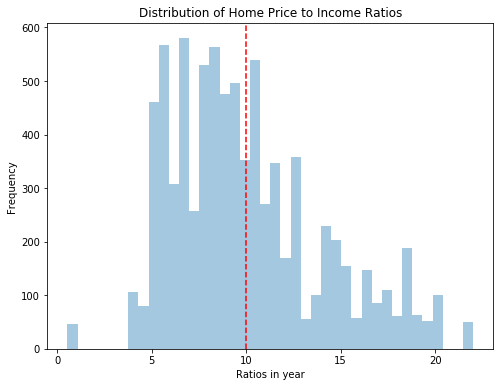

In [23]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df['home_price_to_income_ratios'], kde=False)
ax.set_title('Distribution of Home Price to Income Ratios')
ax.set_ylabel('Frequency')
ax.set_xlabel('Ratios in year')
plt.axvline(x=df['home_price_to_income_ratios'].mean(), color='r', linestyle='--');

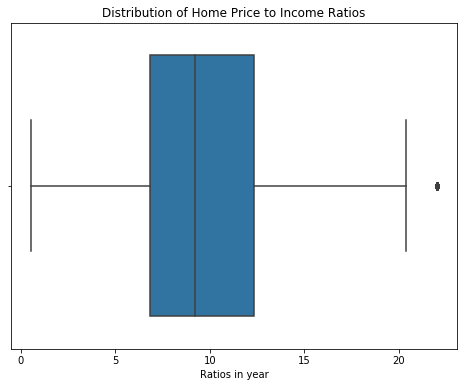

In [24]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(df['home_price_to_income_ratios'])
ax.set_title('Distribution of Home Price to Income Ratios')
ax.set_xlabel('Ratios in year');

The target 'home_price_to_income_ratios' is slightly right skewed, and some outliers on the higher end. 

### TODO: Visualiazation for Distribution of Home Price to Income Ratios

## Investigate categorical data

The only useful categorical columns for modeling is the 'open_now' column. 

In [25]:
df.describe(include=object)

,name,open_now,place_id,searched_keyword,compound_code,global_code
count,8166,7884,8166,8166,8163,8163
unique,5810,2,8166,3,7986,7928
top,Dunkin',True,ChIJHbh1d9v0wokR5v4Vw-C-bG8,restaurant,"J25Q+R6 Brooklyn, New York",87G8J25Q+R6
freq,439,7130,1,3260,4,4


In [26]:
# drop_first=False since we might not use linear regression models
df = pd.get_dummies(df, columns=['open_now'], drop_first=False, dummy_na=True)

## Investigate numerical data

Columns such as zipcode, location_lat, location_lng etc. are nominal.   
Columns that contain's business type information are categorical in nature.  
I will not explore those columns in this section.

In [27]:
df.describe()

,zipcode,price_level,rating,user_ratings_total,searched_zipcode,location_lat,location_lng,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios,price_level*rating,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,total_number_of_bars_by_zipcode,total_number_of_cafes_by_zipcode,user_ratings_total_per_capita,rating_weighed_population_density,open_now_False,open_now_True,open_now_nan
count,8166.000000,4987.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.0,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,4987.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000,8166.000000
mean,10762.693608,1.675957,4.075398,322.767695,10763.380480,40.727565,-73.928664,0.000857,0.002327,0.078619,0.089028,0.000245,0.003184,0.003551,0.219691,0.000122,0.009674,0.000122,0.071516,0.070536,0.013960,0.039922,0.032329,1.0,0.012981,0.005756,0.757164,0.000122,0.034656,0.000490,0.002694,0.060740,0.000735,0.024614,0.050453,0.066005,0.009184,0.000122,0.033921,0.000122,0.002449,0.000245,0.112540,0.022777,0.0,0.007348,0.000122,0.000245,0.002572,0.009429,1.0,0.025104,0.501225,0.000245,0.015307,0.002327,0.000122,0.000245,0.598579,0.021798,0.000245,0.000245,50634.423953,47646.411021,21243.660911,10.016076,6.929076,1.634721,4.075398,322.767695,4.647073,11.583395,0.011354,194552.141166,0.092334,0.873133,0.034533
std,575.304404,0.586714,0.792878,954.401839,574.968362,0.082737,0.092027,0.029267,0.048183,0.269159,0.284801,0.015649,0.056340,0.059491,0.414063,0.011066,0.097887,0.011066,0.257701,0.256064,0.117333,0.195787,0.176884,0.0,0.113198,0.075651,0.428823,0.011066,0.182918,0.022128,0.051838,0.238867,0.027098,0.154956,0.218891,0.248307,0.095400,0.011066,0.181037,0.011066,0.049432,0.015649,0.316049,0.149202,0.0,0.085408,0.011066,0.015649,0.050649,0.096652,0.0,0.156451,0.500029,0.015649,0.122780,0.048183,0.011066,0.015649,0.490216,0.146031,0.015649,0.015649,26293.570052,31856.830926,10389.978473,4.040684,2.696373,0.266850,0.214264,235.730861,3.666583,6.104185,0.056434,137310.972102,0.289515,0.332845,0.182606
min,10001.000000,1.000000,0.000000,0.000000,10001.000000,40.506413,-74.251412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1749.000000,1277

In [28]:
numerical_columns = [
       'price_level', 'rating', 'user_ratings_total','population',
       'population_density_square_miles', 'housing_units', 'price_level*rating',
       'avg_price_level_by_zipcode', 'avg_rating_by_zipcode',
       'avg_user_ratings_total_by_zipcode', 'total_number_of_bars_by_zipcode',
       'total_number_of_cafes_by_zipcode', 'user_ratings_total_per_capita',
       'rating_weighed_population_density'
]

In [29]:
# Define a function to visualize all numerical columns
def histograms_numeric_columns(df, numerical_columns):
    '''
    take df, numerical columns as list
    return group histagrams
    '''
    f = pd.melt(df, value_vars=numerical_columns) 
    g = sns.FacetGrid(f, col='variable',  col_wrap=3, sharex=False, sharey=False)
    g = g.map(sns.distplot, 'value')
    return g

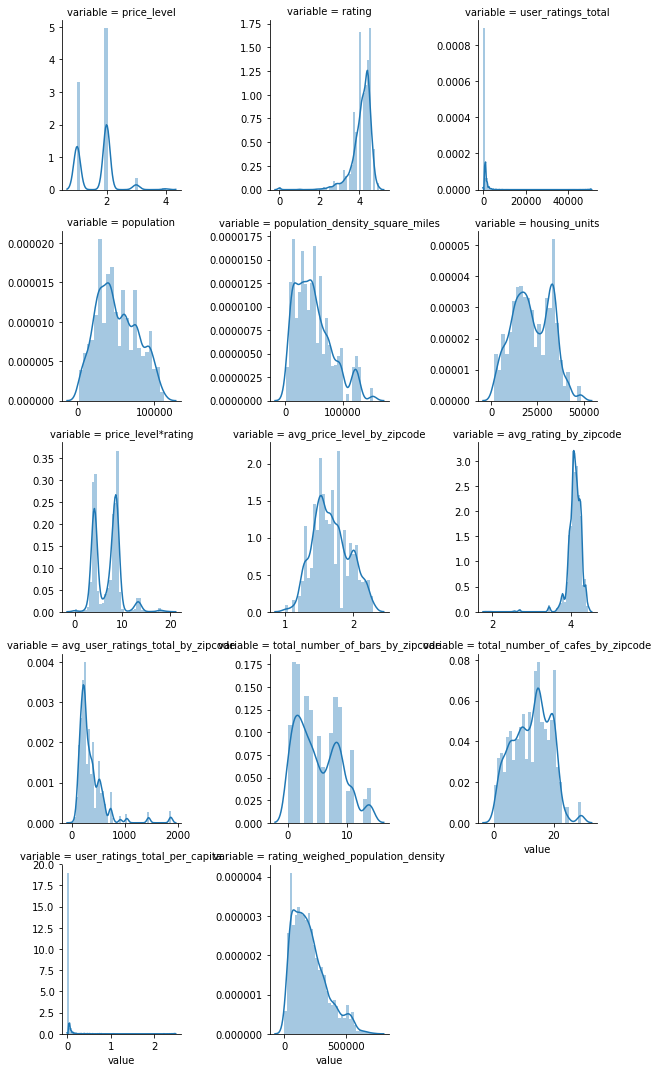

In [30]:
histograms_numeric_columns(df.dropna(), numerical_columns)

In [31]:
def scatter_plots(df, numerical_cols, target_col):
    '''
    Take a dataframe, a list of numerical columns, a target column as string
    Return a group of scatter plots
    '''
    # Calculate the number of rows
    num_rows = (len(numerical_cols) // 3) + 1
    # Generate a 3 x n subplots frame
    fix, ax = plt.subplots(num_rows, 3, sharey='row', figsize=(15,20))

    # Reference: https://stackoverflow.com/a/434328
    # Define a function to iterate through a list and divide them into chunks
    def chunker(seq, size):
        return (seq[pos:pos + size] for pos in range(0, len(seq), size))
    
    # Iterate through numerical_cols and generate each subplot
    for y, plot_group in enumerate(chunker((numerical_cols), 3)):
        for x, col in enumerate(plot_group):
            sub_ax = ax[y][x]
            plots = sub_ax.scatter(df[col], df[target_col], s=2)
            plots_titles = sub_ax.set_title(col)
    return (plots, plots_titles)

(<matplotlib.collections.PathCollection at 0x13a28db90>,
 Text(0.5,1,'rating_weighed_population_density'))

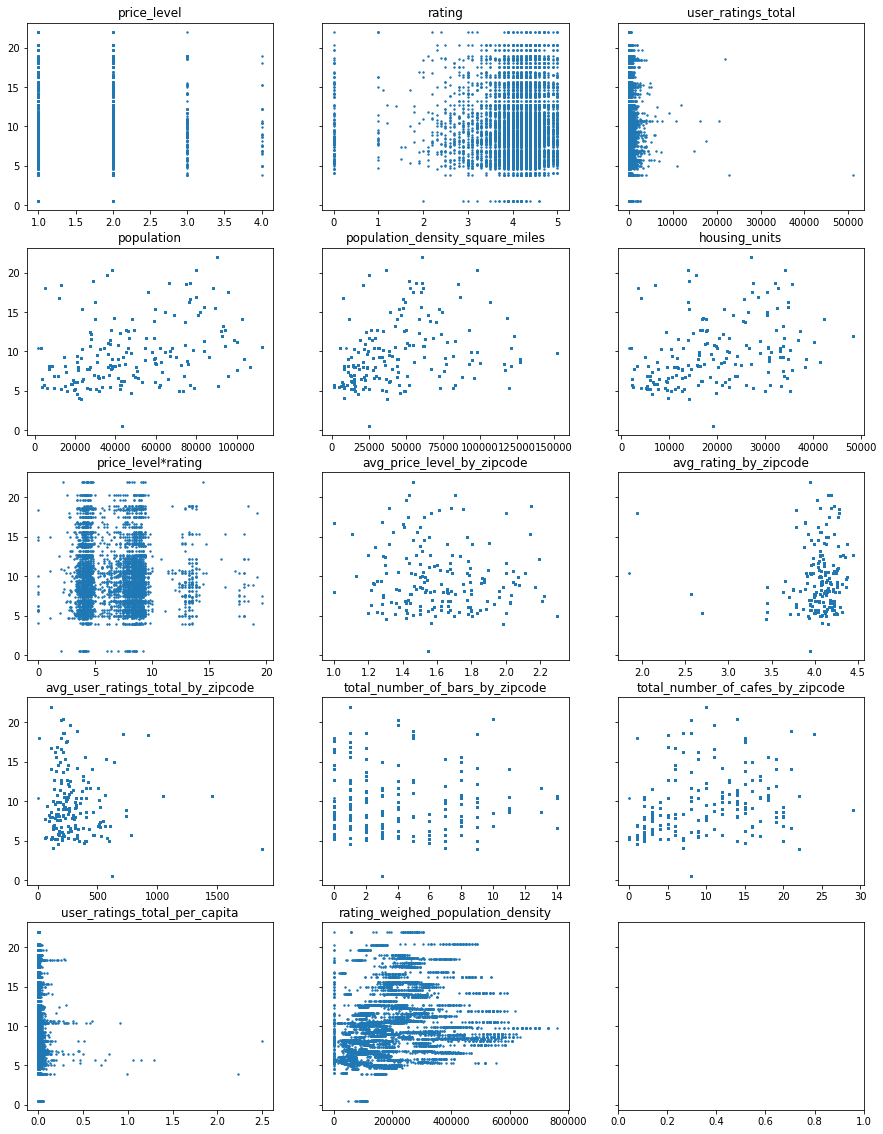

In [32]:
scatter_plots(df, numerical_columns, 'home_price_to_income_ratios')

In [33]:
df.head()

,zipcode,name,place_id,price_level,rating,user_ratings_total,searched_keyword,searched_zipcode,location_lat,location_lng,compound_code,global_code,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,population,population_density_square_miles,housing_units,home_price_to_income_ratios,price_level*rating,avg_price_level_by_zipcode,avg_rating_by_zipcode,avg_user_ratings_total_by_zipcode,total_number_of_bars_by_zipcode,total_number_of_cafes_by_zipcode,user_ratings_total_per_capita,rating_weighed_population_density,open_now_False,open_now_True,open_now_nan
0,11223,Global Hardware & Paint (aka Frankson),ChIJ3Ug-3PpEwokRkn0qGIl8cKE,NaN,4.2,26,stores,11223,40.604466,-73.973706,"J23G+QG Brooklyn, New York",87G8J23G+QG,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,81789,39441.7,30438,15.011575,NaN,1.551724,4.156897,183.810345,3,16,0.000318,165655.14,0,1,0
1,11103,Moa Coffee,ChIJ7e2Eyq1fwokRB-bXkMTupvc,NaN,4.9,36,coffee shops,11103,40.762531,-73.912536,"Q37P+2X Astoria, Queens, NY",87G8Q37P+2X,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,36140,50794.4,18016,11.095091,NaN,1.789474,4.267273,216.472727,5,14,0.000996,248892.56,0,1,0
2,10007,Sole Di Capri,ChIJvY0XQR9awokRuNTH8EY_EFo,2.0,4.4,161,restaurant,10007,40.715227,-74.007493,PX8V+32 New York,87G7PX8V+32,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7023,44029.0,3366,8.103305,8.8,1.959184,4.114286,734.339286,8,20,0.022925,193727.60,0,1,0
3,10451,Dunkin',ChIJl6674Hf1wokRc8Kw-LbXEPc,1.0,4.2,23,coffee shops,10451,40.815989,-73.928045,"R38C+9Q The Bronx, New York",87G8R38C+9Q,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,47798,46447.4,19884,4.688635,4.2,1.416667,3.930189,384.018868,6,15,0.000481,195079.08,0,1,0
4,10034,Taqueria Emilio,ChIJtQupQ_bzwokR1zGJQAvFso4,NaN,4.4,190,restaurant,10034,40.866256,-73.920029,V38H+GX New York,87G8V38H+GX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,42910,39355.3,16650,6.261423,NaN,1.666667,4.228571,276.489796,6,15,0.004428,173163.32,0,1,0


In [34]:
# data = dict(
#     type = 'choropleth',
#     locations = df['zipcode'],
#     locationmode='zipcode',
#     colorscale = ['balance'],
#     z=df['home_price_to_income_ratios'])

# map_1 = go.Figure(data=[data])
# py.offline.plot(map_1)

In [35]:
# plt.figure(figsize=(10, 10))
# plt.scatter(df['location_lng'], df['location_lat'], s=2)

In [36]:
def heatmap_numeric_w_dependent_variable(df, dependent_variable):
    '''
    Generate a heatmap of dependent variable's correlation with y
    '''
    plt.figure(figsize=(8, 30))
    g = sns.heatmap(df.corr()[[dependent_variable]].sort_values(by=dependent_variable), 
                    annot=True, 
                    cmap='coolwarm', 
                    vmin=-1,
                    vmax=1) 
    return g

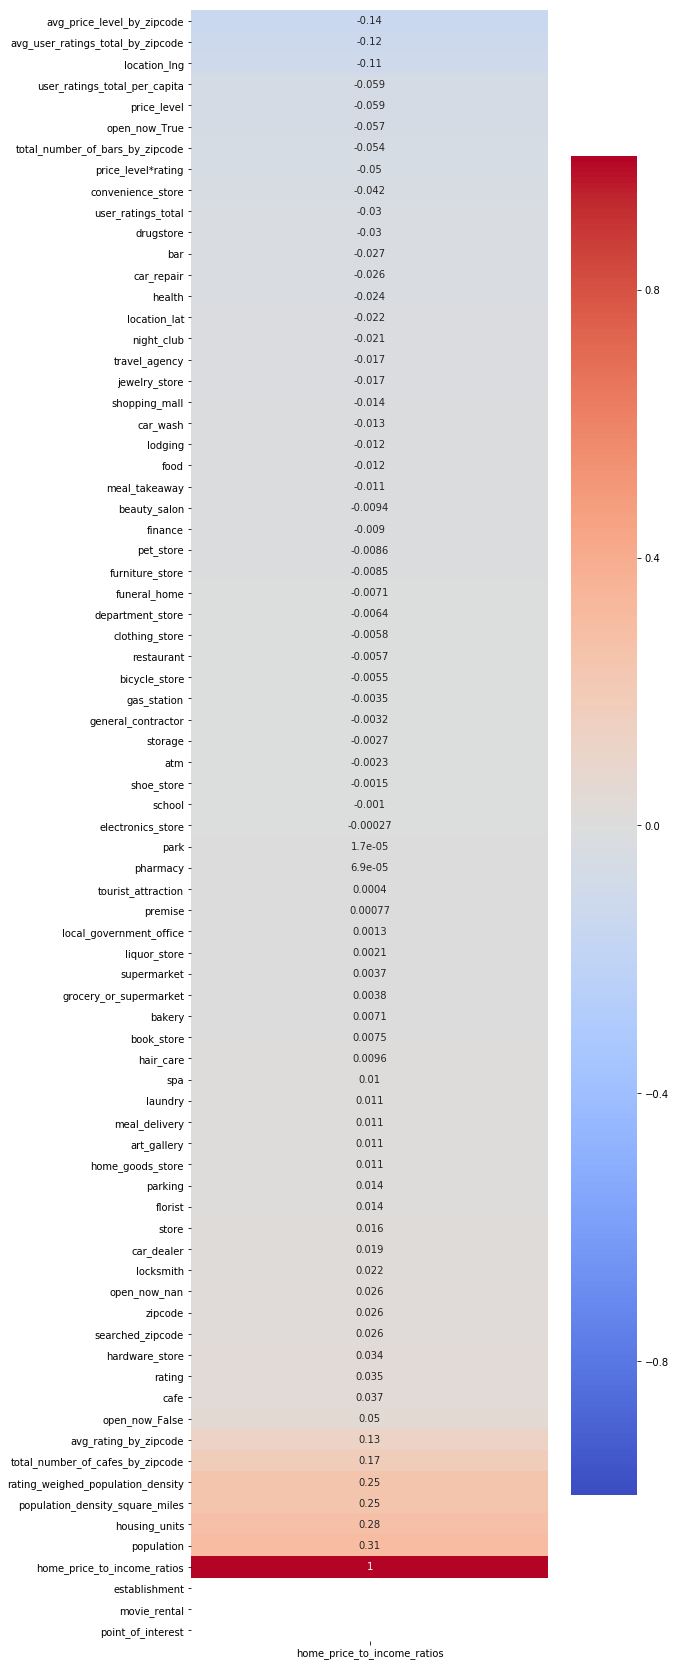

In [37]:
heatmap_numeric_w_dependent_variable(df, 'home_price_to_income_ratios')

## EDA Summary:

Based on our EDA, we have a non-linear dataset. 
In this case, a classic linear regression model may not be able to handle it. 
[Reference](https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/)

In [38]:
df.shape

(8166, 82)

In [39]:
df.to_csv('../data/final_nyc.csv', index=False)

# Modeling: NYC dataset

In [40]:
df.columns

Index(['zipcode', 'name', 'place_id', 'price_level', 'rating',
       'user_ratings_total', 'searched_keyword', 'searched_zipcode',
       'location_lat', 'location_lng', 'compound_code', 'global_code',
       'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon', 'bicycle_store',
       'book_store', 'cafe', 'car_dealer', 'car_repair', 'car_wash',
       'clothing_store', 'convenience_store', 'department_store', 'drugstore',
       'electronics_store', 'establishment', 'finance', 'florist', 'food',
       'funeral_home', 'furniture_store', 'gas_station', 'general_contractor',
       'grocery_or_supermarket', 'hair_care', 'hardware_store', 'health',
       'home_goods_store', 'jewelry_store', 'laundry', 'liquor_store',
       'local_government_office', 'locksmith', 'lodging', 'meal_delivery',
       'meal_takeaway', 'movie_rental', 'night_club', 'park', 'parking',
       'pet_store', 'pharmacy', 'point_of_interest', 'premise', 'restaurant',
       'school', 'shoe_store', 'shopping_mall

In [41]:
columns = [
       'price_level', 'rating', 'user_ratings_total', 
        'art_gallery', 'atm', 'bakery', 'bar', 'beauty_salon',
        'bicycle_store', 'book_store', 'cafe', 'car_dealer', 'car_repair',
        'car_wash', 'clothing_store', 'convenience_store', 'department_store',
        'drugstore', 'electronics_store', 'establishment', 'finance', 'florist',
        'food', 'funeral_home', 'furniture_store', 'gas_station',
        'general_contractor', 'grocery_or_supermarket', 'hair_care',
        'hardware_store', 'health', 'home_goods_store', 'jewelry_store',
        'laundry', 'liquor_store', 'local_government_office', 'locksmith',
        'lodging', 'meal_delivery', 'meal_takeaway', 'movie_rental',
        'night_club', 'park', 'parking', 'pet_store', 'pharmacy',
        'point_of_interest', 'premise', 'restaurant', 'school', 'shoe_store',
        'shopping_mall', 'spa', 'storage', 'store', 'supermarket',
        'tourist_attraction', 'travel_agency',  
        #'population_density_square_miles', 'population', 'housing_units', 
        'home_price_to_income_ratios', 'price_level*rating',
       #'avg_price_level_by_zipcode', 'avg_rating_by_zipcode',
       # 'avg_user_ratings_total_by_zipcode', 
       #'user_ratings_total_per_capita', 'rating_weighed_population_density'
       ]


In [42]:
final = df[columns].dropna()

In [43]:
final.head()

,price_level,rating,user_ratings_total,art_gallery,atm,bakery,bar,beauty_salon,bicycle_store,book_store,cafe,car_dealer,car_repair,car_wash,clothing_store,convenience_store,department_store,drugstore,electronics_store,establishment,finance,florist,food,funeral_home,furniture_store,gas_station,general_contractor,grocery_or_supermarket,hair_care,hardware_store,health,home_goods_store,jewelry_store,laundry,liquor_store,local_government_office,locksmith,lodging,meal_delivery,meal_takeaway,movie_rental,night_club,park,parking,pet_store,pharmacy,point_of_interest,premise,restaurant,school,shoe_store,shopping_mall,spa,storage,store,supermarket,tourist_attraction,travel_agency,home_price_to_income_ratios,price_level*rating
2,2.0,4.4,161,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,8.103305,8.8
3,1.0,4.2,23,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,4.688635,4.2
6,1.0,4.2,1009,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,11.299069,4.2
7,1.0,4.0,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,5.382012,4.0
8,2.0,4.2,567,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,5.097080,8.4


In [44]:
target = 'home_price_to_income_ratios'
X = final.drop(columns=target)
y = final[target]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.70)

## Baseline Model

[reference](https://chrisalbon.com/machine_learning/model_evaluation/create_baseline_regression_model/)

In [46]:
from sklearn.dummy import DummyRegressor

In [47]:
# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean', constant=20)

# "Train" dummy regressor
dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=20, quantile=None, strategy='mean')

In [48]:
dummy_mean.score(X_train, y_train)

0.0

In [49]:
dummy_mean.score(X_test, y_test)

-3.2674845733549063e-06

## Linear Regression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(X_train, y_train)

0.015671254053839512

In [53]:
lr.score(X_test, y_test)

-0.013383792152477314

In [54]:
cross_val_score(lr, X, y, cv=5).mean()

-0.010727665733607594

In [55]:
y_train_preds = lr.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_preds))

3.970496574306991

In [56]:
y_test_preds = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

3.952062539496267

In [57]:
# cross_val_score = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')
# np.sqrt(-cross_val_score).mean()

## KNN

In [58]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

pipe_params = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__p' : [1, 2],
    'knn__weights' : ['uniform', 'distance']
}

gs_knn = GridSearchCV(
    pipe,
    pipe_params,
    cv=5
).fit(X_train, y_train);

In [59]:
gs_knn.best_params_

{'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}

In [60]:
gs_knn.best_score_

-0.11043667581620915

In [61]:
gs_knn.score(X_train, y_train)

0.12150865127450405

In [62]:
gs_knn.score(X_test, y_test)

-0.08227217906070838

In [63]:
cross_val_score(gs_knn.best_estimator_, X, y, scoring='r2', cv=5).mean()

-0.07855864202608691

In [64]:
y_train_preds = gs_knn.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_preds))

3.7509690957648756

In [65]:
y_test_preds = gs_knn.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

4.084181923102806

## Tree

In [66]:
X_train.columns

Index(['price_level', 'rating', 'user_ratings_total', 'art_gallery', 'atm',
       'bakery', 'bar', 'beauty_salon', 'bicycle_store', 'book_store', 'cafe',
       'car_dealer', 'car_repair', 'car_wash', 'clothing_store',
       'convenience_store', 'department_store', 'drugstore',
       'electronics_store', 'establishment', 'finance', 'florist', 'food',
       'funeral_home', 'furniture_store', 'gas_station', 'general_contractor',
       'grocery_or_supermarket', 'hair_care', 'hardware_store', 'health',
       'home_goods_store', 'jewelry_store', 'laundry', 'liquor_store',
       'local_government_office', 'locksmith', 'lodging', 'meal_delivery',
       'meal_takeaway', 'movie_rental', 'night_club', 'park', 'parking',
       'pet_store', 'pharmacy', 'point_of_interest', 'premise', 'restaurant',
       'school', 'shoe_store', 'shopping_mall', 'spa', 'storage', 'store',
       'supermarket', 'tourist_attraction', 'travel_agency',
       'price_level*rating'],
      dtype='object')

In [67]:
# Use grid search to find best hyperparams
gs_tree = GridSearchCV(
    estimator = DecisionTreeRegressor(random_state=42),
    param_grid = {
        'max_depth' : [15, 20, 30],
        'min_samples_split' : [2, 3, 5],
        'min_samples_leaf' : [2, 3, 5],
         #'max_features' : [4, 6, 10]
    },
    cv=5
).fit(X_train, y_train)

In [68]:
gs_tree.best_params_

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [69]:
gs_tree.best_score_

-0.2778598913819171

In [70]:
gs_tree.score(X_train, y_train)

0.24572156305891235

In [71]:
gs_tree.score(X_test, y_test)

-0.1980158633347129

In [72]:
cross_val_score(gs_tree.best_estimator_, X, y, scoring='r2', cv=5).mean()

-0.24678568408395032

In [73]:
feature_importance = pd.DataFrame(dict(zip(X_train.columns, gs_tree.best_estimator_.feature_importances_)).items())

In [74]:
feature_importance = feature_importance.sort_values(by=[1])

<BarContainer object of 59 artists>

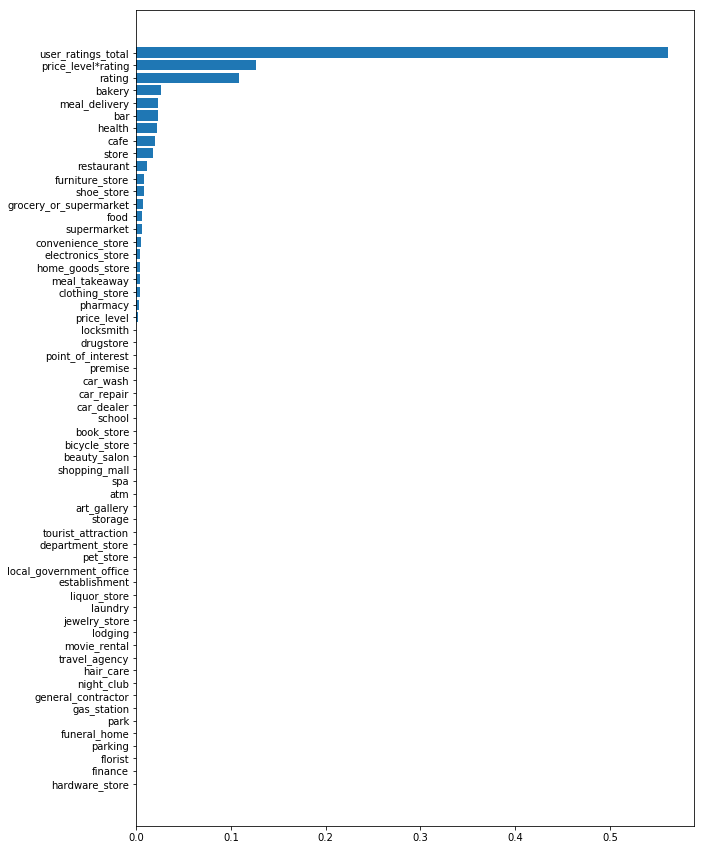

In [75]:
plt.figure(figsize=(10, 15))
plt.barh(y = feature_importance[0], width=feature_importance[1])

In [76]:
y_train_preds = gs_tree.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_train_preds))

3.475686425528192

In [77]:
y_test_preds = gs_tree.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_preds))

4.297027329437719

## Bagged Tree

In [78]:
bag = BaggingRegressor(random_state=42).fit(X_train, y_train)

In [79]:
bag.score(X_train, y_train)

0.7603384057861786

In [80]:
bag.score(X_test, y_test)

-0.24867409122189388

In [81]:
cross_val_score(bag, X, y, scoring='r2', cv=5).mean()

-0.27541169920950886

In [82]:
preds = bag.predict(X_test)

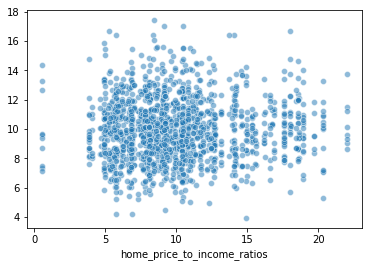

In [83]:
sns.scatterplot(x = y_test, y = preds, alpha = .5)

In [84]:
resids = y_test - preds

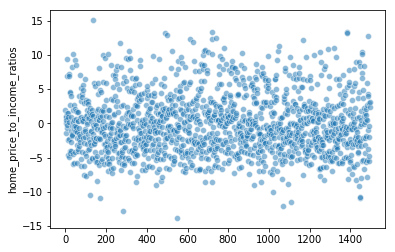

In [85]:
sns.scatterplot(x = range(len(resids)),y = resids, alpha = .5)

## Ada Boost

In [86]:
ad = AdaBoostRegressor(random_state=42).fit(X_train, y_train)

In [87]:
ad.score(X_train, y_train)

-0.03300093300254425

In [88]:
ad.score(X_test, y_test)

-0.04210728055215229

In [89]:
cross_val_score(ad, X, y, scoring='r2', cv=5).mean()

-0.051469548313065785

## Support Vector Machine

In [90]:
# Use a pipeline to combine StandardScaler and KNN
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('svr', SVR())
])

pipe_params = {
   'svr__gamma' : ['scale'],
   'svr__degree' : [3, 4, 5],
    'svr__kernel' :['linear', 'poly']
}

gs_svr = GridSearchCV(
    pipe,
    pipe_params,
    cv=5
).fit(X_train, y_train);

In [91]:
gs_svr.best_params_

{'svr__degree': 3, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}

In [92]:
gs_svr.score(X_train, y_train)

-0.021961973119381195

In [93]:
gs_svr.score(X_test, y_test)

-0.04964001774265903

In [94]:
cross_val_score(gs_svr.best_estimator_, X, y, scoring='r2', cv=5).mean()

-0.04427056988027807

## Polynomial Regression

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
poly = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_poly', LinearRegression())
])
poly.fit(X_train, y_train);

In [97]:
poly.score(X_train, y_train)

0.08032648427299627

In [98]:
poly.score(X_test, y_test)

-6.76144483509909e+23

In [99]:
cross_val_score(poly, X, y, scoring='r2', cv=5).mean()

-4.222857459343934e+22

## Stochastic Gradient Descent

In [100]:
from sklearn.linear_model import SGDRegressor

In [101]:
pipe_2 = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('SGD', SGDRegressor())
])

pipe_params_2 = {
    'SGD__max_iter': [1000],
    'SGD__penalty' : ['l1', 'l2'],
    #'SGD__tol': [1e-3]
}

gs_SGD = GridSearchCV(
    pipe_2,
    pipe_params_2,
    cv=5
    
).fit(X_train, y_train);

In [102]:
gs_SGD.score(X_train, y_train)

-25760.46340508639

In [103]:
gs_SGD.score(X_test, y_test)

-23985.80641471705